In [1]:
import sys
import numpy as np

from pyDFCSR_2D import CSR2D
import matplotlib.pyplot as plt
from matplotlib import cm
import h5py
from pyDFCSR_2D.tools import plot_surface
from pyDFCSR_2D.physical_constants import c as CSPEED
from pyDFCSR_2D.physical_constants import MC2

In [ ]:
pz2 = (E0)*np.sqrt(((1 + delta2)**2 - (mc2/E0)**2) / (1 + xp2**2 + yp2**2))


## Match To FODO

In [2]:
def match_to_FODO(gamma0, emitnx, emitny, L_quad=10*0.026, L_drift=150*0.026, kq=14.584615, verbose = True):

    """
    return  matched twiss for a FODO lattice. The lattice is designed to start with half FODO, so alpha(z = 0) = 0
    L_quad: quad length
    L_drift: length between quads
    
    """

    c0 = CSPEED
    mc2 = gamma0*MC2
    
    xemit = emitnx/gamma0
    yemit = emitny/gamma0
    
    # calculate matched beta functions

    Lq = L_quad # quad length
    Ld = L_drift # undulator section length
    g = kq*mc2/c0 # quad gradient
   
    f = mc2/g*Lq
    #kq = g*c0/mc2
    quadP = np.sqrt(kq)*Lq/2.

    MF = [[np.cos(quadP), np.sin(quadP)/np.sqrt(kq)], [-np.sqrt(kq)*np.sin(quadP), np.cos(quadP)]]
    MD = [[np.cosh(quadP), np.sinh(quadP)/np.sqrt(kq)], [np.sqrt(kq)*np.sinh(quadP), np.cosh(quadP)]]
    ML = [[1, Ld], [0, 1]]

    A = np.dot(MF,np.dot(ML,np.dot(MD,np.dot(MD,np.dot(ML,MF))))) #MF*ML*MD*MD*ML*MF;
    Cphi = A[0,0]
    betaMAX = A[0,1]/np.sqrt(1.-Cphi**2)

    B = np.dot(MD,np.dot(ML,np.dot(MF,np.dot(MF,np.dot(ML,MD))))) #MD*ML*MF*MF*ML*MD;
    Cphi = B[0,0]
    betaMIN = B[0,1]/np.sqrt(1.-Cphi**2)

    xrms_match = np.sqrt(betaMAX * xemit)
    yrms_match = np.sqrt(betaMIN * yemit)
    xprms_match = xemit / xrms_match
    yprms_match = yemit / yrms_match

    if verbose:
        print('beta_x = ', betaMAX)
        print('beta_y = ', betaMIN)
        print('xrms_match = ', xrms_match)
        print('yrms_match = ', yrms_match)
        print('xprms_match = ', xprms_match)
        print('yprms_match = ', yprms_match)
        print('xemit = ', xemit)
        print('yemit = ', yemit)

    return betaMAX, betaMIN

In [3]:
gam0 = 5e9/MC2
betaMAX, betaMIN = match_to_FODO(gamma0 = gam0, emitnx = 0.10e-9 * gam0, emitny = 0.10e-9 * gam0, L_quad=0.1, L_drift=1, kq=1.0, verbose = True)

beta_x =  21.748451407243003
beta_y =  19.578684540527433
xrms_match =  4.66352349701843e-05
yrms_match =  4.424780733610134e-05
xprms_match =  2.144301407807506e-06
yprms_match =  2.2599989925017375e-06
xemit =  1.0000000000000002e-10
yemit =  1.0000000000000002e-10


## Run DFCSR

In [4]:
testCSR = CSR2D(input_file= 'input/fodo_config.yaml')

start reinterpolation. number of slice 1


In [5]:
testCSR.run()

Starting the DFCSR run
Beams written to  C:\Users\yingb\Desktop\pyDFCSR\pyDFCSR_2D\example\output\fodo-2024-06-10T22_46_54-07_00-particles.h5
Wakes written to  C:\Users\yingb\Desktop\pyDFCSR\pyDFCSR_2D\example\output\fodo-2024-06-10T22_46_54-07_00-wakes.h5
Statistics written to  C:\Users\yingb\Desktop\pyDFCSR\pyDFCSR_2D\example\output\fodo-2024-06-10T22_46_54-07_00-statistics.h5


In [6]:
from postprocessor import DFCSR_postprocessor

DFplot1 = DFCSR_postprocessor(run_name = 'fodo-2024-06-10T22_21_25-07_00',
                             work_dir = './output')

DFplot2 = DFCSR_postprocessor(run_name = 'fodo-2024-06-10T22_46_54-07_00',
                             work_dir = './output')


In [7]:
s1, alpha_x1 = DFplot1.get_statistics(key = 'alphaX', show_plot=False)
s1, beta_x1 = DFplot1.get_statistics(key = 'betaX', show_plot=False)
s1, sigma_x1 = DFplot1.get_statistics(key = 'sigX', show_plot=False)

s2, alpha_x2 = DFplot2.get_statistics(key = 'alphaX', show_plot=False)
s2, beta_x2 = DFplot2.get_statistics(key = 'betaX', show_plot=False)
s2, sigma_x2 = DFplot2.get_statistics(key = 'sigX', show_plot=False)


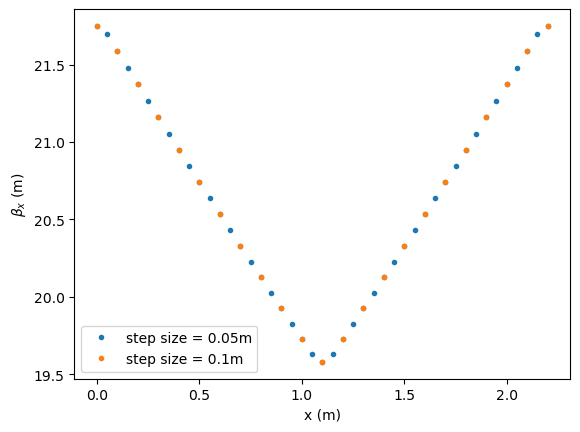

In [8]:
plt.plot(s1, beta_x1, '.', label = 'step size = 0.05m')
plt.plot(s2, beta_x2, '.', label = 'step size = 0.1m')
plt.xlabel('x (m)')
plt.ylabel(r'$\beta_x$ (m)')
plt.legend()

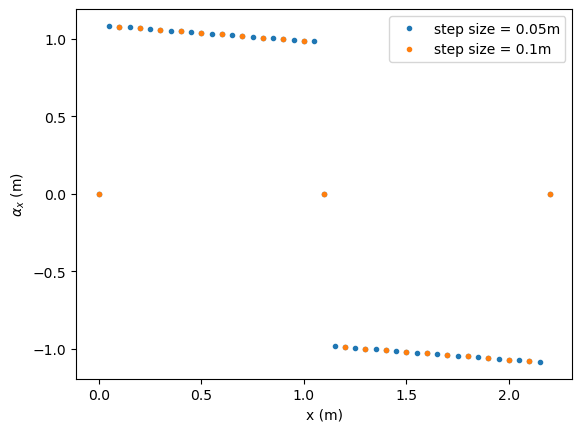

In [9]:
plt.plot(s1, alpha_x1, '.', label = 'step size = 0.05m')
plt.plot(s2, alpha_x2, '.', label = 'step size = 0.1m')
plt.xlabel('x (m)')
plt.ylabel(r'$\alpha_x$ (m)')
plt.legend()

plot longitudinal wakes at nearest point s  = 0.5 m, step count 5
ebeam energy 5000000026.136252


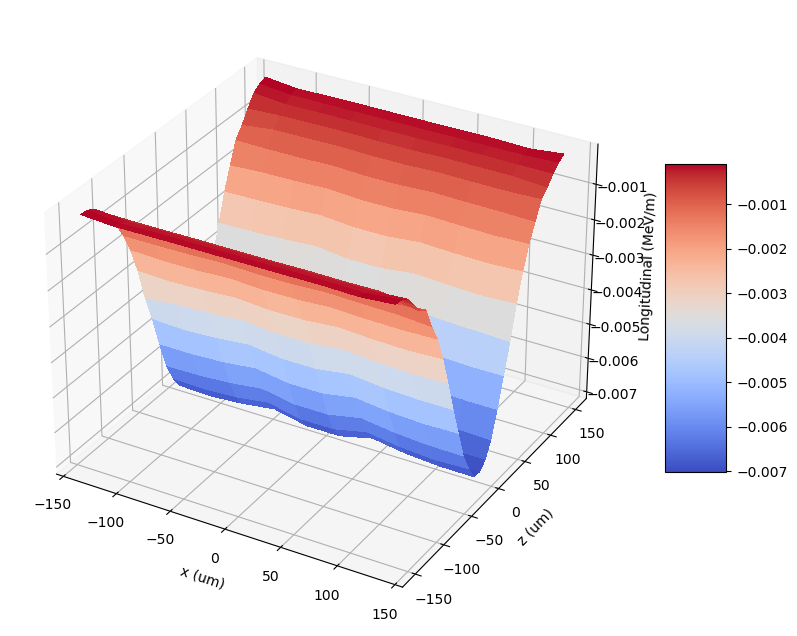

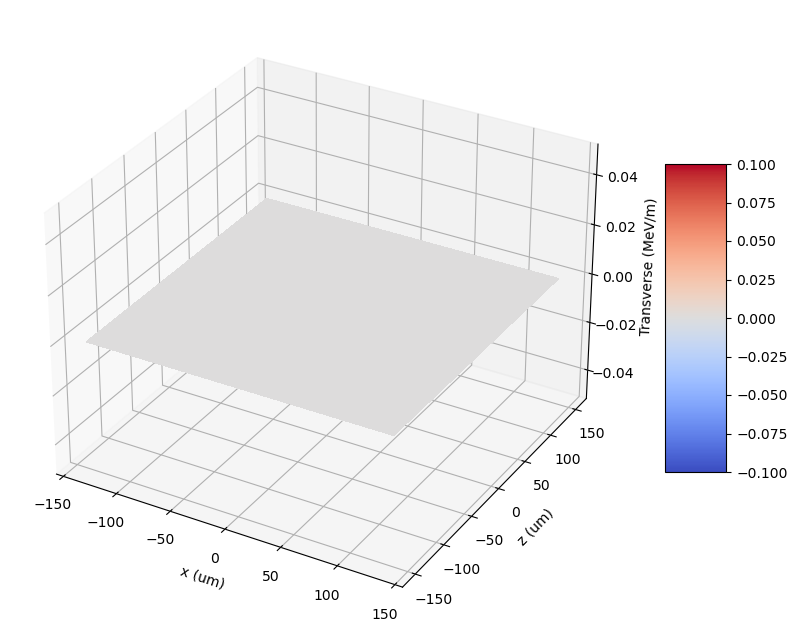

In [15]:
x_grids, z_grids, xkicks, dE_dct = DFplot2.get_wakes(s = 0.5)

plot longitudinal wakes at nearest point s  = 1.1 m, step count 11
ebeam energy 5000000026.136252


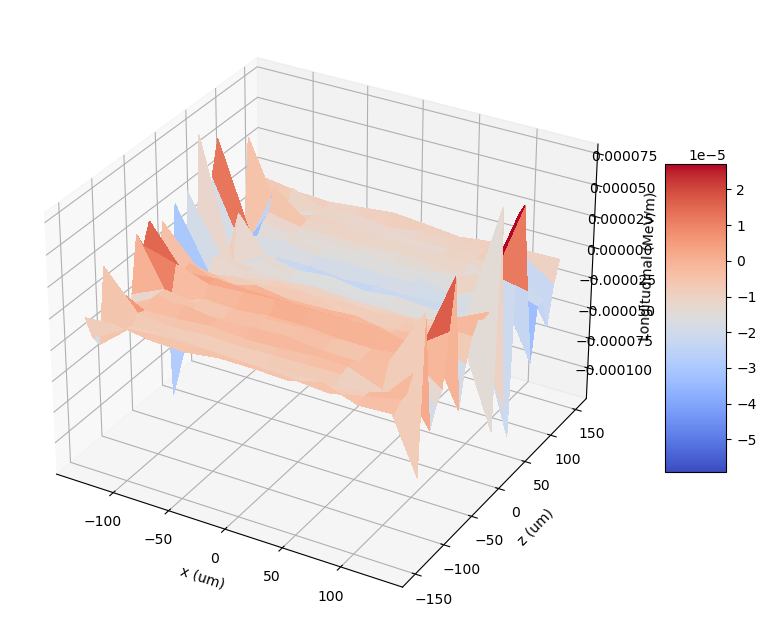

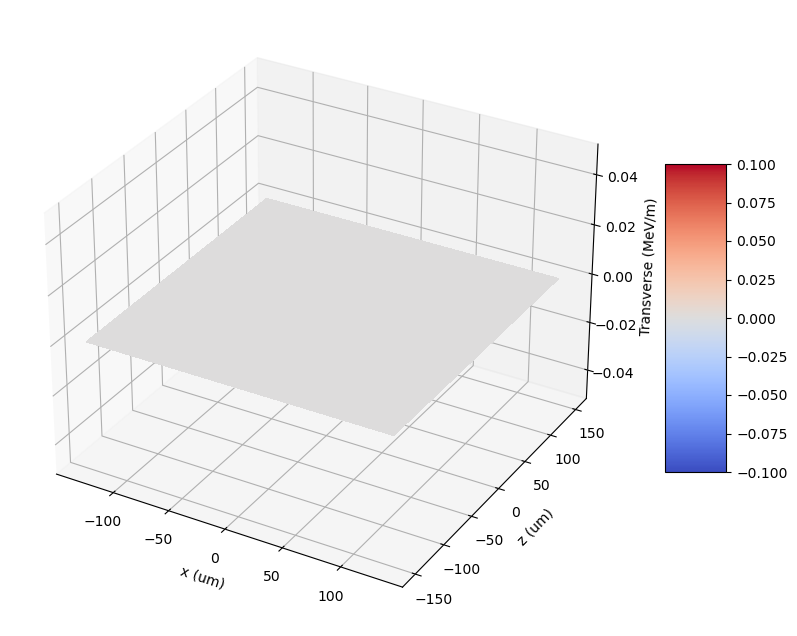

In [14]:
x_grids, z_grids, xkicks, dE_dct = DFplot2.get_wakes(s = 1.1)

plot longitudinal wakes at nearest point s  = 1.8000000000000007 m, step count 18
ebeam energy 5000000026.136252


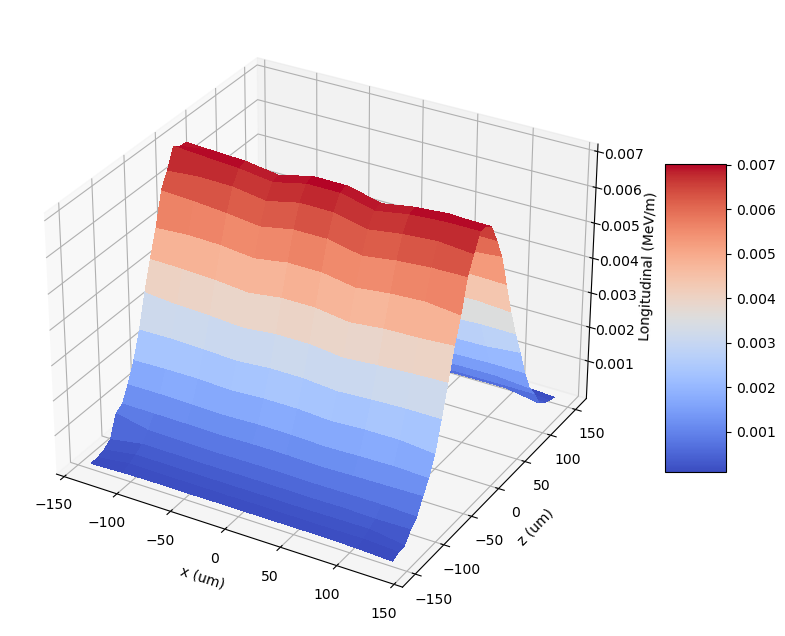

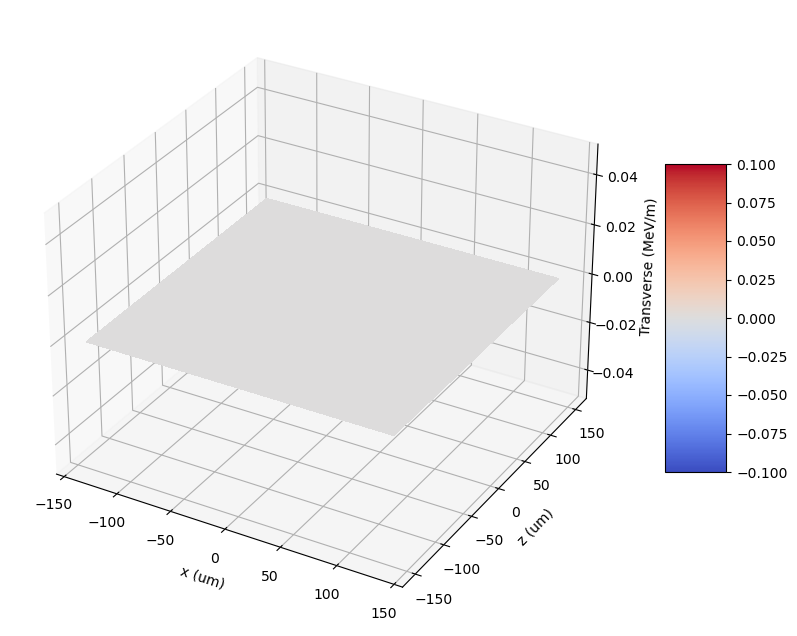

In [16]:
x_grids, z_grids, xkicks, dE_dct = DFplot2.get_wakes(s = 1.8)